## 2D PD Controllers

Last time, we have introduced the basic ideas of PD control mechanisms. However, our discussion focuses on problems with only one variable to keep track of. In particular, we designed a PD controller for an unmanned aerial vehicle (UAV) restricted to motion in only $z$-direction. This week, we are going to generalise the idea to the implementation for a 2D PD controller to guide the motion of the UAV in a 2D plane.

## Principles

### Four-axis drones

A typical commercial UAV has four rotors in a cross-shaped layout. Two pictures of four-axis drones below are shown to give you some rough idea. You can easily purchase one of these from online shopping websites.

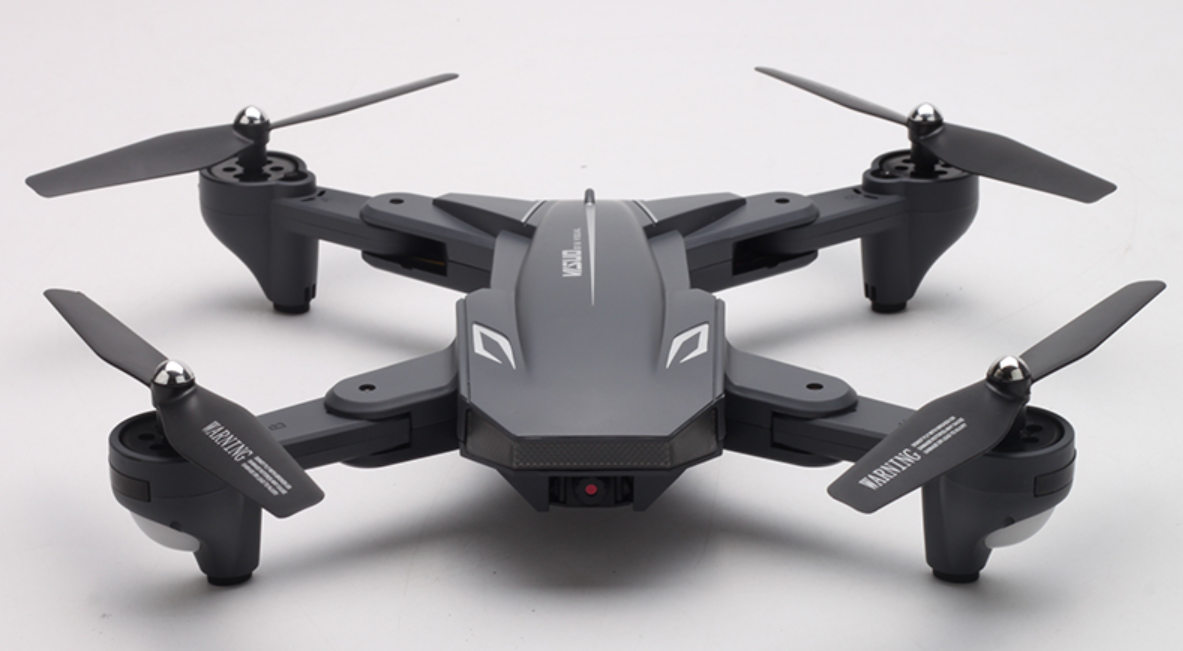

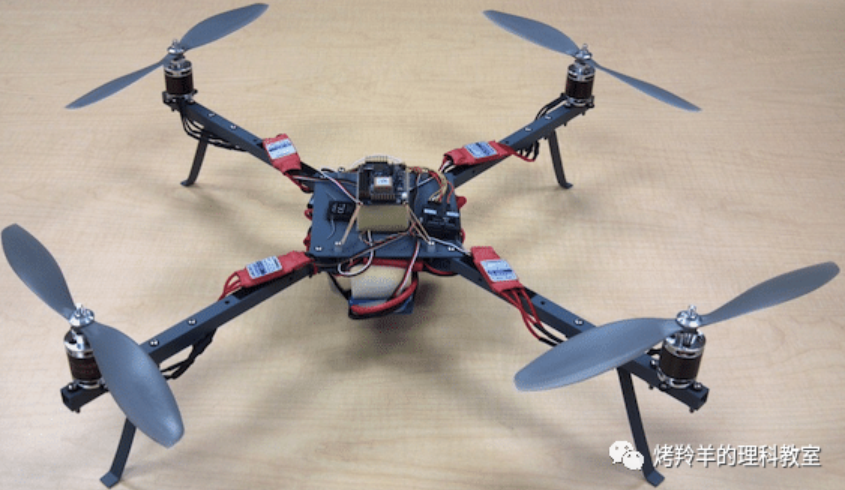

By adjusting the relative speed of each rotor, one can adjust the thrust at different positions and the torsional moment between the rotors so as to control the flight attitude or complete various maneuvering flight tasks.

Suppose the motion of the UAV is restricted in the $yz$-plane only, and the UAV has two controllable output options: the thrust force $T$ and the torque $\tau$. We can put aside how the UAV coordinate between each one of its four rotors to generate the required $T$ and $\tau$. The key question we want to address is the following:

How should the UAV control its outputs so that the UAV could follow a pre-defined trajectory?

The desired path can be given by parametric equations:

$$ y^{\text{des}} = y^{\text{des}}(t), \qquad z^{\text{des}} = z^{\text{des}}(t) $$

To keep on track on this path, we need the UAV to have the correct acceleration at any point to achieve speed control. To do so, it must generate the thrust force $T$ with the right magnitude. The thrust force should also be acted in the right direction, for which we need make adjustments for the torque $\tau$ so that the UAV is oriented in a desired direction. In other words, we need to find the optimal values for the outputs $T$ and $\tau$, i.e., two variables to deal with, so a 2D problem.

### 2D PD controller

Since the translational motion is restricted in the $yz$-plane, the rotational motion has to be about the $x$-axis. At some arbitrary time $t$, the plane of the four rotors of the UAV has some angle $\phi$ to the horizontal. So the posture, or the orientation, of the UAV can be given by a function of time $t$. On the desired path, the UAV should have a desired posture at any instant, let's call that:

$$ \phi_c = \phi_c(t) $$

Our goal is to make $y(t)$, $z(t)$ and $\phi(t)$ be as close as possible to $y_\text{des}(t)$, $z_\text{des}(t)$ and $\phi_c(t)$ with the optimal choice for $T$ and $\tau$.

Like the 1D problem, we introduce the error functions:

$$
\begin{aligned}
e_y(t) &= y_\text{des}(t) - y(t) \\
e_z(t) &= z_\text{des}(t) - z(t) \\
e_\phi(t) &= \phi_c(t) - \phi(t)
\end{aligned}
$$

To minimise these errors, we want to find the outputs such that each of the error functions satisfies:

$$ \ddot{e} + K_d \dot{e} + K_p e = 0 $$

Since we now have three dynamic variables $y$, $z$ and $\phi$, so we will have three pairs of proportional gain $K_p$ and derivative gain $K_d$, a total number of six adjustable parameters to work with. To write all of these equations explicitly, one obtains:

$$
\begin{aligned}
\ddot y &= \ddot{y}_\text{des} + K_{d,y} (\dot{y}_\text{des} - \dot{y}) + K_{p,y} (y_\text{des} - y) &{(1a)} \\
\ddot z &= \ddot{z}_\text{des} + K_{d,z} (\dot{z}_\text{des} - \dot{z}) + K_{p,z} (z_\text{des} - z) &{(1b)}\\
\ddot \phi &= \ddot{\phi}_c + K_{d,\phi} (\dot{\phi}_c - \dot{\phi}) + K_{p,\phi} (\phi_c - \phi) &{(1c)}
\end{aligned} 
$$

The desired accelerations are calculated from these equations, then we can compute how much $T$ and $\tau$ are required for the job.

### A little bit of mechanics

With some elementary knowledge about Newtonian mechanics, we can write down the equations of motion for the UAV in its $y$- and $z$-directions.
$$
\left\{\begin{aligned}
m\ddot{y} &= -T\sin\phi &{(2a)} \\
m\ddot{z} &= T\cos\phi - mg  &{(2b)}\\
\end{aligned} \right.
$$

The rotational part of the dynamics is usually covered in a more advanced course in mechanics. After some formalism, one can show that the key equation for rotatioanl dynamics is completely analagous to the linear version $ m \ddot{x} = F$. The cause of the turning effects, the torque $\tau$, plays a similar role as force $F$. The rate of change of rotational speed, the angular acceleration $\ddot{\phi}$, is analogous to the linear acceleration $\ddot{x}$, both of which are given in terms of a second derivative with respect to time. The property of the body to resist the change in motion, or the inertia, is measured by mass $m$ for translational motion. For rotations, we have a likewise player called the *moment of inertia* $I$, which not only depends on the object's mass but also how its mass is distributed about the axis of rotation. So the rotational version of the Newton's second law comes out in the form: $I \ddot{\phi} = \tau$.

A side remark. Since we live in a 3-dimensional world, there are more than one axis about which a body can rotate, and the torque $\tau$ is also a vector quantity with three components. As a result, the moment of inertia $I$ could be a big mess of as 3 by 3 matrix if you really go into the details, but we definitely don't want to get into that. For our restricted problem, the axis of rotation always lies in the $x$-direction, so we only need one number for the moment of inertia, which is labelled as $I_{xx}$ in the following discussions.

OK, we can now write down the last equation of motion for the UAV:

$$ I_{xx} \ddot{\phi} = \tau \qquad{(2c)} $$

The three equations given in this section govern the physical motion of the UAV, and they are precisely the equations that we will use to simulate the real trajectory of the UAV.

### Linearization makes life easier

Notice the appearance of sine and cosine in the equations. These guys make the equations *non-linear*, which is a bad thing. There is no simple solution to generic non-linear equations.

But the good news is, if the motion of the UAV is kept close to an equilibrium posture where $\phi \approx 0$, then we can simplify these equations in the spirit of *linearization*.

The state of balance at an arbitrary position is to hover in a stationary fashion. This means $\phi^* = 0$ and $T^* = mg$. If the deviation from this state of balance is small throughout the course, we can Taylor expand $\phi$ near $\phi^* = 0$, which leads to small-angle approximations: $\sin \phi \approx \phi$ and $\cos \phi \approx 1$. The equations are simplified to become:

$$
\left\{\begin{aligned}
\ddot{y} &\approx -g\phi &{(3a)}\\
\ddot{z} &\approx -g + \frac{T}{m} &{(3b)}\\
\ddot{\phi} &= \frac{\tau}{I_{xx}} &{(3c)}
\end{aligned}\right.
$$

From (3b) we can find the thrust force required is:

$$
T = m\left[ g+\ddot{z}_\text{des} + K_{d,z} (\dot{z}_\text{des} - \dot{z}) + K_{p,z} ( z_\text{des} - z) \right]
$$

From (3a) we can work out the desired orientation $\phi_c$. Subtitution into (3c) leads to the torque required to achieve this posture:

$$
\begin{aligned}
\phi_c &= -\frac{1}{g}\left[ \ddot{y}_\text{des} + K_{d,y} (\dot{y}_\text{des} - \dot{y}) + K_{p,y} ( y_\text{des} - y) \right] \\
\tau &= I_{xx} \left[ \ddot{\phi}_c + K_{d,\phi} (\dot{\phi}_c - \dot{\phi}) + K_{p,\phi} ( \phi_c - \phi) \right]
\end{aligned}
$$

Since we have assumed that $\phi_c$ is never far away from the equilibrium, so the change in $\phi$ is small. If we substitute $\dot{\phi}_c \approx 0$ and $\ddot{\phi}_c \approx 0$, the formula for torque can be further simplified to be:

$$
\tau = I_{xx} \left[ - K_{d,\phi} \dot{\phi} + K_{p,\phi} ( \phi_c - \phi) \right]
$$

## Testing

The PD controller now has six gain parameters. To have a good control of the UAV's trajectory near the desired path, we need to carefully tune the parameters and find the optimal combination.

In the testing codes below, we are going to find the best combination for the $K_p$'s and $K_d$'s by trial and error. Four pre-defined paths are introduced for testing.

In [1]:
# import libraries for computation and graph plotting
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define physical constants
mass = 0.2       # mass of the UAV
Ixx = 0.008      # moment of inertia
g = 9.81         # acceleration of free fall

# set up initial conditions
y0, y_dot0, y_dotdot0 = 0, 0, 0
z0, z_dot0, z_dotdot0 = 0, 0, 0
phi0 = 0, 0

In [3]:
# main function: PD controller
# required parameters: Kp and Kd parameters for y, z and phi
# 'func' is a Python function that describes the desired trajectory for the UAV to follow
def controller(K, t_step, n_iter, func):
    Kp_y, Kd_y, Kp_z, Kd_z, Kp_phi, Kd_phi = K
    t = np.arange(0.0, n_iter*t_step, t_step)
    # setting up the arrays to store desired trajectory and actual trajectory
    y, y_dot, y_dotdot = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    y_des, y_dot_des, y_dotdot_des = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    z, z_dot, z_dotdot = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    z_des, z_dot_des, z_dotdot_des = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    phi, phi_dot, phi_dotdot = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    phi_des = np.zeros(n_iter)
    
    # initialising the arrays to store the required thrust and torque
    F = np.zeros(n_iter)
    tau = np.zeros(n_iter)

    # setting up the initial values for actual trajectory
    y[0], y_dot[0], y_dotdot[0] = y0, y_dot0, y_dotdot0
    z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0
    F[0] = mass * g

    # feed in coordinates, velocities for desired trajectory
    for i in range(0, n_iter): 
        y_des[i], y_dot_des[i], y_dotdot_des[i] = func(i*t_step)[0]
        z_des[i], z_dot_des[i], z_dotdot_des[i] = func(i*t_step)[1]

    # error = desired trajectory - actual trajectory
    # the goal is to let the error decrease to zero quickly
    # this allows us to determine the acceleration at any time instant
    for i in range(1, n_iter):    
        # equations of motion for quadrotor in y, z and phi
        y_dotdot[i] = -F[i-1]/mass * np.sin(phi[i-1])
        z_dotdot[i] = F[i-1]/mass * np.cos(phi[i-1]) - g
        phi_dotdot[i] = tau[i-1] / Ixx
    
        # estimate actual trajectory using difference method
        y[i] = y[i-1] + y_dot[i-1] * t_step
        y_dot[i] = y_dot[i-1] + y_dotdot[i-1] * t_step
        z[i] = z[i-1] + z_dot[i-1] * t_step
        z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
        phi[i] = phi[i-1] + phi_dot[i-1] * t_step
        phi_dot[i] = phi_dot[i-1] + phi_dotdot[i-1] * t_step
    
        # compute the required output from PD controller
        phi_des[i] = - (y_dotdot_des[i] + Kd_y * (y_dot_des[i] - y_dot[i]) + Kp_y * (y_des[i] - y[i])) / g
        F[i] = mass * (g + z_dotdot_des[i] + Kd_z * (z_dot_des[i] - z_dot[i]) + Kp_z * (z_des[i] - z[i]) )
        tau[i] = Ixx * (-Kd_phi * phi_dot[i] + Kp_phi * (phi_des[i] - phi[i]))

    plt.plot(y_des, z_des, label='Desired Trajectory')
    plt.plot(y, z, label='Actual Trajectory')
    plt.legend()
    plt.ylabel('Vertical Height (metres)')
    plt.xlabel('Horizontal Distance (metres)')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.show()

In [4]:
# define constant parameters
t_step = 0.01
n_iter = 800

In [5]:
# define PD control parameters
# you should try to find the best combination for the six parameters
# note that the control parameters for phi could be significantly greater than those for y and z
Kp_y = 18
Kd_y = 5
Kp_z = 45
Kd_z = 12
Kp_phi = 800
Kd_phi = 30
K = Kp_y, Kd_y, Kp_z, Kd_z, Kp_phi, Kd_phi

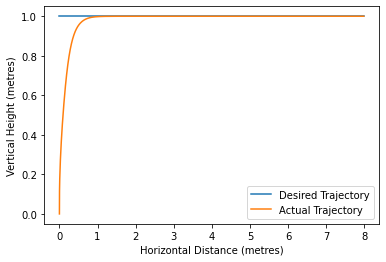

In [6]:
# test 1: horizontal motion at a fixed height
def const_height_traj(t):
    # return values [[y_des, vy_des, ay_des], [z_des, vz_des, az_des]]
    return [[t, 1, 0], [1, 0, 0]]

controller(K, t_step, n_iter, const_height_traj)

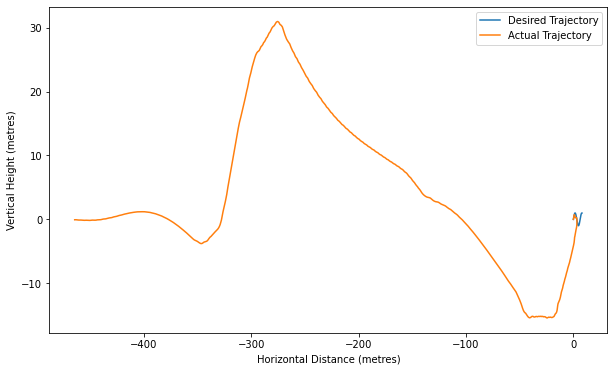

In [7]:
# test 2: fly along a sinusoidal path
def sine_traj(t):
    # return values [[y_des, vy_des, ay_des], [z_des, vz_des, az_des]]
    return [[t, 1, 0], [np.sin(t), np.cos(t), -np.sin(t)]]

controller(K, t_step, n_iter, sine_traj)

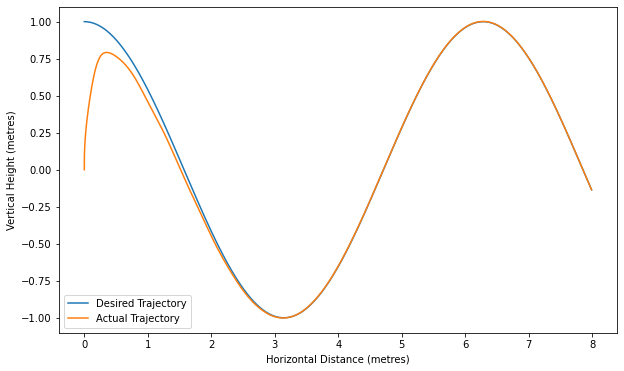

In [8]:
# test 3: fly along a cosinusoidal path
def cosine_traj(t):
    # return values [[y_des, vy_des, ay_des], [z_des, vz_des, az_des]]
    return [[t, 1, 0], [np.cos(t), -np.sin(t), -np.cos(t)]]

controller(K, t_step, n_iter, cosine_traj)

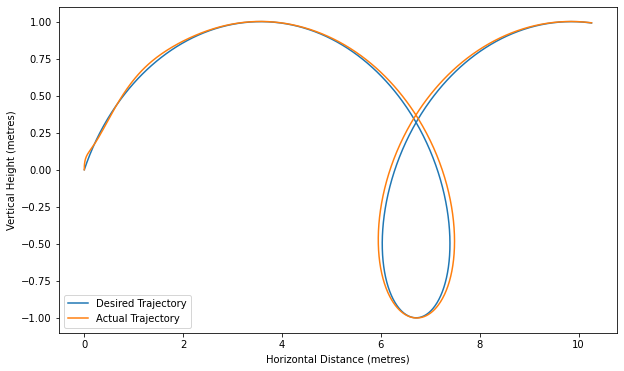

In [9]:
# test 4: fly along a spiral path
def spiral_traj(t):
    return [[2 + t - 2*np.cos(t), 1 + 2*np.sin(t), -2*np.cos(t)], [np.sin(t), np.cos(t), -np.sin(t)]]

# the roll angle does not stay small throughout the course
# so linearisation does not work as well as in previous cases
# PD parameters need to be modified to produce better control
Kp_y = 40
Kd_y = 6
Kp_z = 60
Kd_z = 12
Kp_phi = 800
Kd_phi = 30
K = Kp_y, Kd_y, Kp_z, Kd_z, Kp_phi, Kd_phi

controller(K, t_step, n_iter, spiral_traj)

### Discussions

In the implementation, we have used linearisation to make things less horrifying. We can see that the controller can produce quite nice results for smooth paths.

However, if the UAV is made to perform a spiral trick, surely the orientation of the UAV would experience large changes at some stage during its journey, where the underlying assumption for the validity of linearisation breaks down. We can see the consequences that the actual path is slightly off from the desired path in the last test.

Getting back to the equations (2a)~(2c), one can actually solve the equations analytically despite the ugly form of the solutions. I am not bothering to write out the solutions since they are really an eyesore. You can find their implementation in the codes if you like. What I want to point out here is that, without the approximation, one can find the exact amount of $T$ needed for the required $\ddot{y}$ and $\ddot{z}$ from (2a) and (2b), also the exact amount of $\tau$ to correct for the orientation $\phi$. Again, fiddle with the controller parameters, you could end up with a controller that performs better than the linearised version.

In [10]:
# the PD controllers above used linearization to evaluate the commanded outputs
# we know try to solve the outputs without linearization
# hopefully, the error could be controlled even closer to zero

def better_controller(K, t_step, n_iter, func):
    Kp_y, Kd_y, Kp_z, Kd_z, Kp_phi, Kd_phi = K
    t = np.arange(0.0, n_iter*t_step, t_step)
    # setting up the arrays to store desired trajectory and actual trajectory
    y, y_dot, y_dotdot = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    y_des, y_dot_des, y_dotdot_des = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    z, z_dot, z_dotdot = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    z_des, z_dot_des, z_dotdot_des = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    phi, phi_dot, phi_dotdot = np.zeros(n_iter), np.zeros(n_iter), np.zeros(n_iter)
    phi_des = np.zeros(n_iter)
    
    # initialising the arrays to store the required thrust and torque
    F = np.zeros(n_iter)
    tau = np.zeros(n_iter)

    # setting up the initial values for actual trajectory
    y[0], y_dot[0], y_dotdot[0] = y0, y_dot0, y_dotdot0
    z[0], z_dot[0], z_dotdot[0] = z0, z_dot0, z_dotdot0
    F[0] = mass * g

    # feed in coordinates, velocities for desired trajectory
    for i in range(0, n_iter): 
        y_des[i], y_dot_des[i], y_dotdot_des[i] = func(i*t_step)[0]
        z_des[i], z_dot_des[i], z_dotdot_des[i] = func(i*t_step)[1]

    # error = desired trajectory - actual trajectory
    # the goal is to let the error decrease to zero quickly
    # this allows us to determine the acceleration at any time instant
    for i in range(1, n_iter):    
        # equations of motion for quadrotor in y, z and phi
        y_dotdot[i] = -F[i-1]/mass * np.sin(phi[i-1])
        z_dotdot[i] = F[i-1]/mass * np.cos(phi[i-1]) - g
        phi_dotdot[i] = tau[i-1] / Ixx
    
        # estimate actual trajectory using difference method
        y[i] = y[i-1] + y_dot[i-1] * t_step
        y_dot[i] = y_dot[i-1] + y_dotdot[i-1] * t_step
        z[i] = z[i-1] + z_dot[i-1] * t_step
        z_dot[i] = z_dot[i-1] + z_dotdot[i-1] * t_step
        phi[i] = phi[i-1] + phi_dot[i-1] * t_step
        phi_dot[i] = phi_dot[i-1] + phi_dotdot[i-1] * t_step
        
        # compute the required output from PD controller
        ydotdot_c = y_dotdot_des[i] + Kd_y * (y_dot_des[i] - y_dot[i]) + Kp_y * (y_des[i] - y[i])
        zdotdot_c = z_dotdot_des[i] + Kd_z * (z_dot_des[i] - z_dot[i]) + Kp_z * (z_des[i] - z[i])
        F[i] = mass * np.sqrt(ydotdot_c ** 2 + (g + zdotdot_c) ** 2)
        phi_des[i] = np.arcsin(- mass * ydotdot_c / F[i])
        phi_des_dot = (phi_des[i] - phi_des[i-1])/t_step
        tau[i] = Ixx * (Kd_phi * (phi_des_dot - phi_dot[i]) + Kp_phi * (phi_des[i] - phi[i]))     

    plt.plot(y_des, z_des, label='Desired Trajectory')
    plt.plot(y, z, label='Actual Trajectory')
    plt.legend()
    plt.ylabel('Vertical Height (metres)')
    plt.xlabel('Horizontal Distance (metres)')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.show()

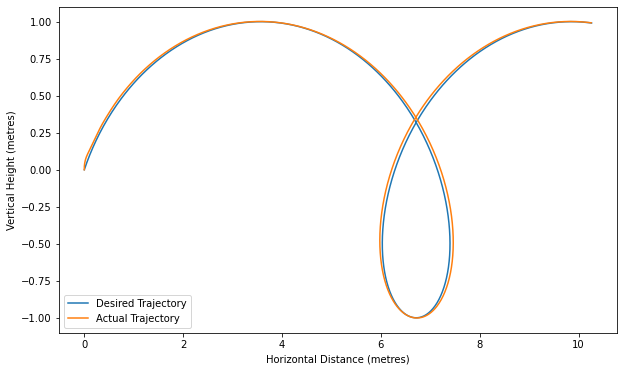

In [11]:
# try to find the best combination for the six parameters
# the control parameters will be different from the previous values
Kp_y = 60
Kd_y = 15
Kp_z = 80
Kd_z = 20
Kp_phi = 750
Kd_phi = 60
K = Kp_y, Kd_y, Kp_z, Kd_z, Kp_phi, Kd_phi

better_controller(K, t_step, n_iter, spiral_traj)